# Cambiar función de activación en keras 
## Julio Cesar Cons Calderón

In [1]:
import pandas as pd 
#df = pd.read_csv("C:/Users/alfredo/Documents/GitHub/RNP/data.csv")
df = pd.read_csv("archive/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop(['id',"Unnamed: 32"], axis=1)

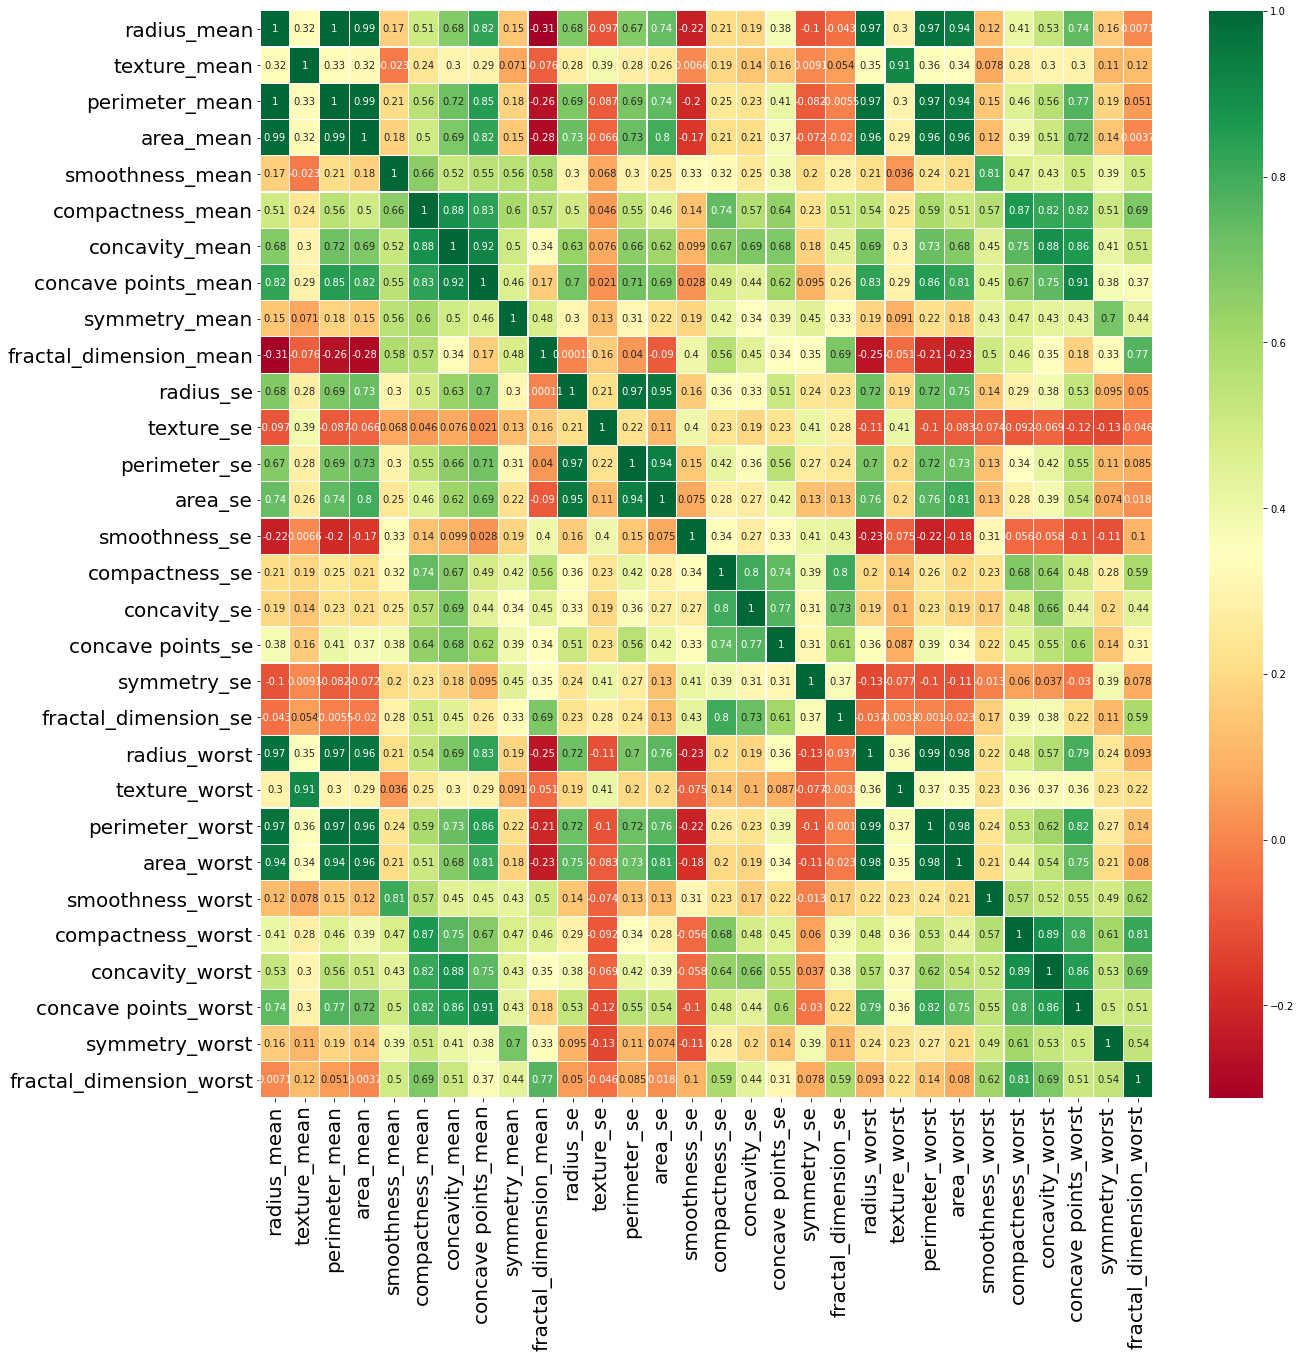

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [4]:
cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
       'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
       'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst',
       'perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se',
       'concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

df = df.drop(cols, axis=1)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['diagnosis'], axis=1)
y_df = df['diagnosis']
y_df = [0 if x == 'B' else 1 for x in y_df]

In [6]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [398,1])
y_ts = np.reshape(y_ts, [171,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(171, 12)
(398, 12)
(171, 1)
(398, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (398, 12)
Testing Data : (171, 12)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
13/13 [==============================] - 0s 10ms/step - loss: 5.3788 - accuracy: 0.6357 - val_loss: 0.8934 - val_accuracy: 0.6316
Epoch 2/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.6685 - val_loss: 0.6259 - val_accuracy: 0.6374
Epoch 3/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6239 - val_loss: 0.5935 - val_accuracy: 0.6491
Epoch 4/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy

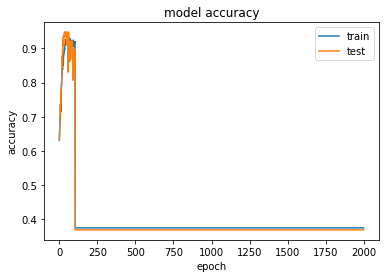

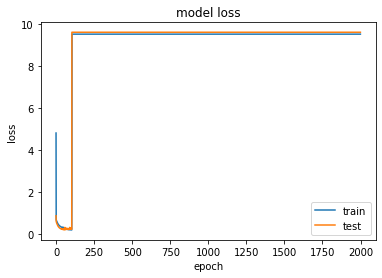

Maximum Loss : 9.5404

Minimum Loss : 0.2182

Loss difference : 9.3221


In [17]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense

# Hyperparameters
training_epochs = 2000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(12, input_dim=12,activation='tanh'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='tanh'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))
